In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/health-insurance-marketplace/Crosswalk2015.csv
/kaggle/input/health-insurance-marketplace/database.sqlite
/kaggle/input/health-insurance-marketplace/Crosswalk2016.csv
/kaggle/input/health-insurance-marketplace/BenefitsCostSharing.csv
/kaggle/input/health-insurance-marketplace/PlanAttributes.csv
/kaggle/input/health-insurance-marketplace/hashes.txt
/kaggle/input/health-insurance-marketplace/Rate.csv
/kaggle/input/health-insurance-marketplace/BusinessRules.csv
/kaggle/input/health-insurance-marketplace/Network.csv
/kaggle/input/health-insurance-marketplace/ServiceArea.csv
/kaggle/input/health-insurance-marketplace/raw/Machine_Readable_PUF_2015-12-21.xlsx
/kaggle/input/health-insurance-marketplace/raw/Plan_Crosswalk_PUF_2014-12-22.csv
/kaggle/input/health-insurance-marketplace/raw/._Rate_PUF.csv
/kaggle/input/health-insurance-marketplace/raw/._Service_Area_PUF.csv
/kaggle/input/health-insurance-marketplace/raw/._Plan_Attributes_PUF_2014_2015-03-09.csv
/kaggle/input/health-in

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

In [3]:
df_benefits = pd.read_csv('/kaggle/input/health-insurance-marketplace/BenefitsCostSharing.csv',dtype={'BenefitName':'str',
                                                                  'CoinsInnTier1':'str',
                                                                   'CopayInnTier1':'str',
                                                                  'ImportDate':'str'})



/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
def eda(dataframe):
    missing_value =  pd.DataFrame(dataframe.isnull().sum(), columns = ['IsNull']) 
    typevals = pd.DataFrame(dataframe.dtypes, columns = ['DType'])
    print ("dataframe index \n", dataframe.index)

    print ("dataframe shape \n", dataframe.shape)
    print ("dataframe describe \n", dataframe.describe())
    nunique = []
    for i in dataframe:
        nunique.append([i,dataframe[i].nunique()])
    nunique = pd.DataFrame(nunique, columns = ['index','NUnique'])
    nunique.set_index('index', inplace = True)
    return pd.concat([missing_value, typevals, nunique], axis=1)
eda(df_benefits)

dataframe index 
 RangeIndex(start=0, stop=5048408, step=1)
dataframe shape 
 (5048408, 32)
dataframe describe 
        BusinessYear      IssuerId     IssuerId2       LimitQty   MinimumStay     RowNumber    VersionNum
count  5.048408e+06  5.048408e+06  5.048408e+06  687683.000000  16727.000000  5.048408e+06  5.048408e+06
mean   2.015127e+03  5.220360e+04  5.220360e+04     142.399374     47.937048  9.839018e+01  7.637094e+00
std    7.563664e-01  2.592498e+04  2.592498e+04    1723.372817      5.892297  2.177890e+01  3.803627e+00
min    2.014000e+03  1.004600e+04  1.004600e+04       1.000000      5.000000  6.100000e+01  1.000000e+00
25%    2.015000e+03  3.253600e+04  3.253600e+04       1.000000     48.000000  8.000000e+01  5.000000e+00
50%    2.015000e+03  4.839600e+04  4.839600e+04      20.000000     48.000000  9.900000e+01  7.000000e+00
75%    2.016000e+03  7.498000e+04  7.498000e+04      40.000000     48.000000  1.170000e+02  9.000000e+00
max    2.016000e+03  9.996900e+04  9.996900e+04

,IsNull,DType,NUnique
index,,,
BenefitName,0,object,861
BusinessYear,0,int64,3
CoinsInnTier1,1113847,object,115
CoinsInnTier2,4571587,object,37
CoinsOutofNet,1113847,object,60
CopayInnTier1,1113847,object,516
CopayInnTier2,4571587,object,278
CopayOutofNet,1113849,object,232
EHBVarReason,3020737,object,12


In [5]:
df_bsrules = pd.read_csv('/kaggle/input/health-insurance-marketplace/BusinessRules.csv')
eda(df_bsrules)

dataframe index 
 RangeIndex(start=0, stop=21085, step=1)
dataframe shape 
 (21085, 23)
dataframe describe 
        BusinessYear      IssuerId    VersionNum     IssuerId2     RowNumber
count  21085.000000  21085.000000  21085.000000  21085.000000  21085.000000
mean    2015.321745  52857.554517      6.791036  52857.554517     11.050036
std        0.646315  26097.535028      4.092377  26097.535028      2.863195
min     2014.000000  10046.000000      1.000000  10046.000000     10.000000
25%     2015.000000  31609.000000      4.000000  31609.000000     10.000000
50%     2015.000000  49046.000000      6.000000  49046.000000     10.000000
75%     2016.000000  76526.000000      8.000000  76526.000000     11.000000
max     2016.000000  99969.000000     24.000000  99969.000000     49.000000


,IsNull,DType,NUnique
index,,,
BusinessYear,0,int64,3
StateCode,0,object,39
IssuerId,0,int64,910
SourceName,0,object,3
VersionNum,0,int64,23
ImportDate,0,object,268
IssuerId2,0,int64,910
TIN,0,object,343
ProductId,1683,object,3034


In [6]:
df_planatt = pd.read_csv('/kaggle/input/health-insurance-marketplace/PlanAttributes.csv')
eda(df_planatt)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


dataframe index 
 RangeIndex(start=0, stop=77353, step=1)
dataframe shape 
 (77353, 176)
dataframe describe 
        BeginPrimaryCareCostSharingAfterNumberOfVisits  BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays  BenefitPackageId  BusinessYear  DEHBInnTier2FamilyMOOP  DEHBInnTier2FamilyPerGroupMOOP  DEHBInnTier2FamilyPerPersonMOOP  DEHBInnTier2IndividualMOOP  EHBPercentPremiumS4  EHBPercentTotalPremium          HPID  InpatientCopaymentMaximumDays      IssuerId     IssuerId2     RowNumber    VersionNum
count                                    77353.000000                                       77353.000000              77353.00000  77353.000000                     0.0                             0.0                              0.0                         0.0         41877.000000            23110.000000  1.185000e+04                   77353.000000  77353.000000  77353.000000  77353.000000  77353.000000
mean                                         0.154202                       

,IsNull,DType,NUnique
index,,,
AVCalculatorOutputNumber,22825,object,8075
BeginPrimaryCareCostSharingAfterNumberOfVisits,0,int64,7
BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,0,int64,8
BenefitPackageId,0,int64,66
BusinessYear,0,int64,3
...,...,...,...
URLForEnrollmentPayment,15853,object,463
URLForSummaryofBenefitsCoverage,7124,object,20321
UniquePlanDesign,11649,object,3


In [7]:
df_benefits.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,Combined annual benefit maximum of $1000 per y...,2014-03-19 07:06:49,Covered,NaN,No,No,NaN,No,No,21989,21989,1000.0,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,No,No,21989,21989,1.0,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,"24 month waiting period, See policy for additi...",2014-03-19 07:06:49,Covered,NaN,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [8]:
df_benefits = df_benefits.fillna(np.nan)
print ('Unique benefits pesent in the USA frpm 2014 to 2016:%d' %df_benefits.BenefitName.nunique())

Unique benefits pesent in the USA frpm 2014 to 2016:861


In [9]:
df_benefits[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                            
                   count unique                           top   freq
BusinessYear                                                        
2014             1164869    496  Dental Check-Up for Children  18719
2015             2079286    517           Orthodontia - Adult  31269
2016             1804253    429           Orthodontia - Adult  27389



Now we are checking how much state wise Benefits are taken

In [10]:
df_benefits[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Unique_State = df_benefits.StateCode.unique()
benefitarray = []

for state in Unique_State:
    state_benefit =  len(df_benefits[df_benefits["StateCode"] == state])    
    benefitarray.append(state_benefit)   

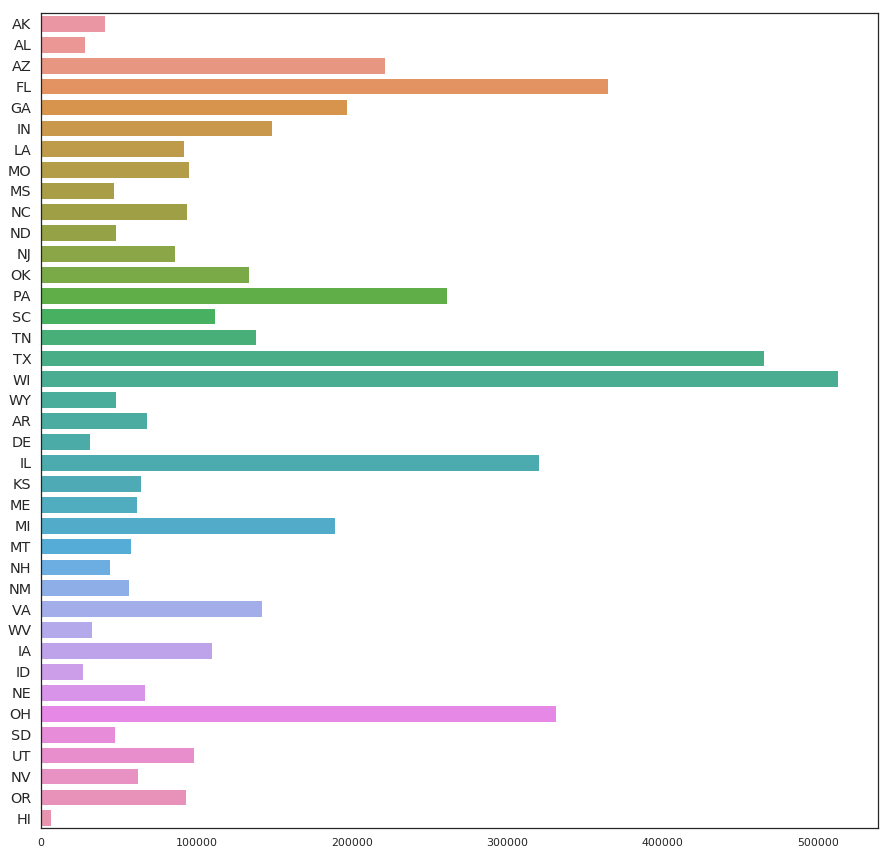

"\nax.set_xticks(x)\n# Set ticks labels for x-axis\nax.set_xticklabels(Unique_State, rotation='vertical', fontsize='small')\nplt.show()\n"

In [11]:
f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(Unique_State, rotation='horizontal', fontsize='large')
g = sns.barplot(y = Unique_State,x=benefitarray)
plt.show()

# Set number of ticks for x-axis
"""
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(Unique_State, rotation='vertical', fontsize='small')
plt.show()
"""



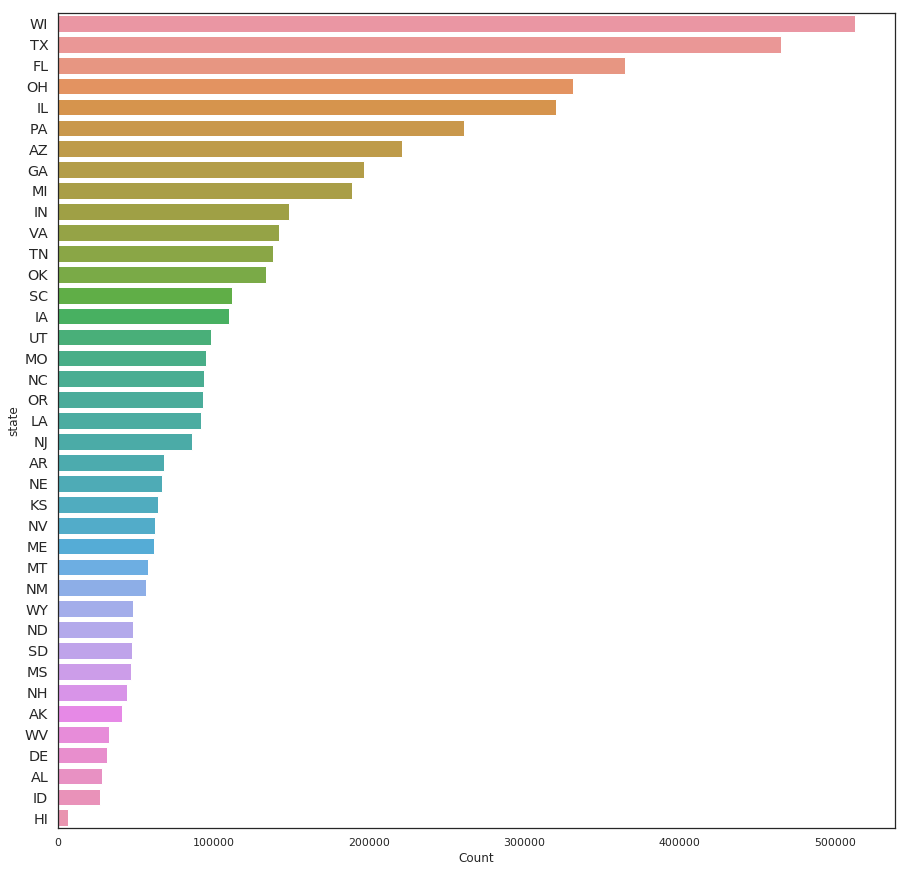

In [12]:
df = pd.DataFrame(
    {'state': Unique_State,
     'Count' : benefitarray
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.show()

In [13]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
data = dict(type = 'choropleth',
           locations = df['state'],
           locationmode = 'USA-states',
           colorscale = 'teal',
            text = df['state'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
           z = df['Count'],
           colorbar = {'title':'No of Benefit plans'})

layout = dict(title = 'Benefit plan spread across variuos state in USA',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

From graph we can conclude that state WI is the largest consumer of health services followed by TX
We can even verify which benefit plan is sold more in each states

In [14]:
df_benefits['BenefitName'].count()
df_benefits["BenefitName"].value_counts()


Orthodontia - Adult                   77377
Basic Dental Care - Child             77353
Basic Dental Care - Adult             77353
Dental Check-Up for Children          77353
Routine Dental Services (Adult)       77353
                                      ...  
Implant Adult                             1
Vital pulpotomy                           1
root Canal Therapy and Retreatment        1
Posterior Composites - Child              1
Prefab Resin Crown                        1
Name: BenefitName, Length: 861, dtype: int64

 Number of individual benefit plans:  52394
Average number of benefits per plan:  96.35469710272169


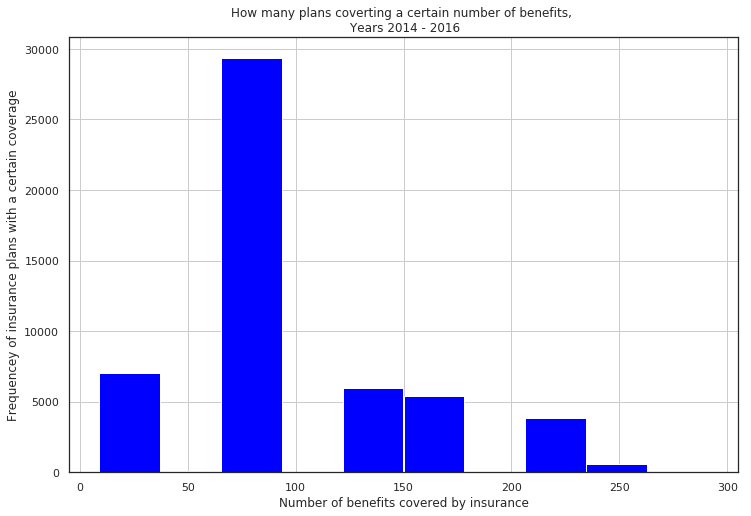

In [15]:
print (' Number of individual benefit plans: ', len(df_benefits.groupby('PlanId')['BusinessYear'].count()))
total=df_benefits.shape[0]
count=df_benefits.PlanId.nunique()
print ('Average number of benefits per plan: ', total/count)
df_benefits.groupby('PlanId')['BusinessYear'].count().hist(figsize = (12,8), color = 'blue')
plt.title('How many plans coverting a certain number of benefits, \n Years 2014 - 2016')
_ = plt.xlabel('Number of benefits covered by insurance')
_ = plt.ylabel('Frequencey of insurance plans with a certain coverage')
plt.show()